In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Image1.txt")

In [75]:
data.head()

,-3.0002,-3.0379,1
0,-2.56010,-4.00340,1
1,-3.03620,-3.49110,1
2,-3.68670,-1.74540,1
3,-2.88520,-3.37610,1
4,-0.83721,-0.59433,1


In [76]:
np.random.permutation(len(data))

array([7989, 1829, 5903, ..., 4598, 5514, 8023])

In [77]:
X= data.iloc[:,0:1].values
y=data.iloc[:,1:2].values

In [78]:
X.shape


(9999, 1)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
pred=lm.predict(X_test)
pred

array([[ 2.81962324],
       [ 1.73121622],
       [-1.90544676],
       ...,
       [ 2.10793125],
       [ 3.50557528],
       [ 2.89916687]])

In [82]:
lm.score(X_test,y_test)

0.8130915920031568

In [83]:
def graddes(X,y,alpha,theta,it):
    m=np.size(y)
    c1=cost(X,y,theta)
    
    for i in range(0,it):
        hx=np.matmul(X,theta)
        temp=(float(alpha)/m)*(np.matmul(X.T,(hx-y)))
        c2=cost(X,y,theta-temp)
        if c2<c1:
            c1=c2
            theta=theta-temp
    return theta

In [84]:
def cost(X,y,theta):
    m=np.size(y)-
    hx=np.matmul(X,theta)
    return (float(np.sum(np.power(np.subtract(hx, y), 2))) / (2 * m))

In [85]:
t=X_train
m=y_train.size
X_train=np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))
theta=np.matrix(np.ones(2).reshape(2,1))

In [86]:
theta = graddes(X_train,y_train,0.000001,theta,100)
c =cost(X_train,y_train,theta)
print(c)

1.4873745859201783


[[0.99990082]
 [0.99988866]]


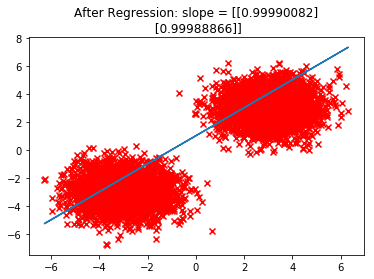

1.4873745859201783


In [87]:
print(theta)
plt.scatter(np.array(t), np.array(y_train), marker = 'x', color='r')
plt.plot(np.array(t),np.array(np.matmul(X_train, theta)))
plt.title("After Regression: slope = " + str(theta))
plt.show()
print(cost( X_train, y_train,theta))

In [88]:
xt=X_test
m=y_test.size
X_test=np.hstack((np.matrix(np.ones(m).reshape(m,1)),xt))

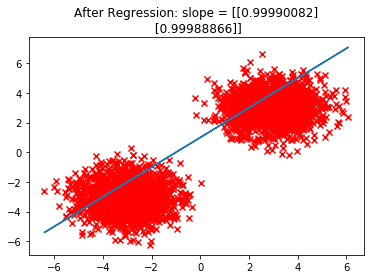

1.4549891111212936


In [89]:
plt.scatter(np.array(xt), np.array(y_test), marker = 'x', color='r')
plt.plot(np.array(xt),np.array(np.matmul(X_test, theta)))
plt.title("After Regression: slope = " + str(theta))
plt.show()
print(cost( X_test, y_test,theta))